In [ ]:
!python -m pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install simfin

# Import the main functionality from the SimFin Python API.
import simfin as sf

# Import names used for easy access to SimFin's data-columns.
from simfin.names import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 2.7 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
from datetime import date, timedelta

In [ ]:
path = '/content/gdrive/My Drive/nasdaq_csv/'


In [ ]:
import os
import glob
import pandas as pd
os.chdir(path)


extension = 'csv'
all_filenames = []
for i in glob.glob('*.{}'.format(extension)):
  all_filenames.append(i)
print(len(all_filenames))


1573


In [ ]:
#Reading the file of financial companies on Nasdaq database
finan = pd.read_csv("/content/gdrive/My Drive/nasdaq_csv/finan_nasdaq.csv")

In [ ]:
finan.head()

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,AAIN,Arlington Asset Investment Corp 6.000% Senior ...,$23.18,-0.08,-0.344%,0.000000e+00,United States,NaN,3065,Finance,Finance/Investors Services
1,AAMC,Altisource Asset Management Corp Com,$85.62,0.07,0.082%,1.507620e+08,United States,NaN,11587,Finance,Real Estate
2,AAME,Atlantic American Corporation Common Stock,$2.29,0.09,4.091%,4.664095e+07,United States,NaN,8781,Finance,Life Insurance
3,AB,AllianceBernstein Holding L.P. Units,$33.79,0.60,1.808%,3.845339e+09,United States,NaN,339440,Finance,Investment Managers
4,ABCB,Ameris Bancorp Common Stock,$30.53,0.88,2.968%,2.117984e+09,United States,1994.0,606047,Finance,Major Banks


In [ ]:
finan["Symbol"]

0        AAIN
1        AAMC
2        AAME
3          AB
4        ABCB
        ...  
1694     ZION
1695    ZIONL
1696    ZIONO
1697    ZIONP
1698      ZTR
Name: Symbol, Length: 1699, dtype: object

In [ ]:
#Filtering only bank companies
tempdata = finan.loc[(finan["Industry"] == 'Major Banks'), ["Symbol"]]

In [ ]:
type(tempdata)

pandas.core.frame.DataFrame

In [ ]:
#Preparing the list of names of bank.
finName = []
for file in tempdata["Symbol"]:
  file = file +".csv"
  if (file in all_filenames) and (file != "FCNCA.csv") and (file!= "HIFS.csv"):
    finName.append(file)

In [ ]:
print(len(finName))

150


In [ ]:
nasdaq100 = pd.read_csv("small_stock_name.txt", header = None)
nasdaq100 = np.array(pd.Series(nasdaq100[0]))
nasdaq100Symbol = []
for file in nasdaq100:
  file = file + ".csv"
  nasdaq100Symbol.append(file)

In [ ]:
# SimFin data-directory.
sf.set_api_key('c5705f56-95aa-4a23-b8e7-d170c63bb263')
sf.set_data_dir('~/simfin_data/')

In [ ]:
hub = sf.StockHub(market='us',
                  refresh_days=30,
                  refresh_days_shareprices=1)

In [ ]:
%%time
df_fin_signals = hub.fin_signals(variant='latest')

Dataset "us-income-ttm" not on disk.
- Downloading ... 100.0%
- Extracting zip-file ... Done!
- Loading from disk ... Done!
Dataset "us-balance-ttm" not on disk.
- Downloading ... 100.0%
- Extracting zip-file ... Done!
- Loading from disk ... Done!
Dataset "us-cashflow-ttm" not on disk.
- Downloading ... 100.0%
- Extracting zip-file ... Done!
- Loading from disk ... Done!
Dataset "us-shareprices-latest" not on disk.
- Downloading ... 100.0%
- Extracting zip-file ... Done!
- Loading from disk ... Done!
Cache-file 'fin_signals-899db0b4.pickle' not on disk.
- Running function fin_signals() ... 

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  re

In [ ]:
df_fin_signals.dropna().head()

In [ ]:
%%time
df_fin_signals_2y = hub.fin_signals(variant='latest',
                                    func=sf.avg_ttm_2y)

Cache-file 'fin_signals-4a256f6a.pickle' not on disk.
- Running function fin_signals() ... 

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  re

Done!
- Saving cache-file to disk ... Done!
CPU times: user 53.6 s, sys: 1.01 s, total: 54.6 s
Wall time: 55 s


In [ ]:
df_fin_signals_2y.dropna().head()

,,(Dividends + Share Buyback) / FCF,Asset Turnover,CapEx / (Depr + Amor),Current Ratio,Debt Ratio,Dividends / FCF,Gross Profit Margin,Interest Coverage,Inventory Turnover,Log Revenue,Net Acquisitions / Total Assets,Net Profit Margin,Quick Ratio,R&D / Gross Profit,R&D / Revenue,Return on Assets,Return on Equity,Return on Research Capital,Share Buyback / FCF
Ticker,Date,,,,,,,,,,,,,,,,,,,
A,2023-05-26,0.925384,0.591865,0.583511,2.004120,0.279917,0.206511,0.537371,16.792042,7.159915,9.789706,0.027164,0.176260,1.372258,0.130659,0.070213,0.104881,0.219446,7.653554,0.718874
AA,2023-05-26,-3.671254,0.720603,0.720329,1.566795,0.153130,-0.616667,0.219198,9.466719,5.969229,10.044812,-0.036841,0.024911,0.847541,0.013442,0.002693,0.020099,0.050080,82.030303,-3.054587
ABBV,2023-05-26,0.501092,0.364807,0.098491,0.823345,0.540675,0.447243,0.671748,6.979625,15.813509,10.727217,0.138807,0.161385,0.584476,0.188051,0.125926,0.060708,0.570295,5.360769,0.053849
ABCD,2018-12-18,-0.036670,0.941183,0.828530,0.536716,0.342381,-0.000000,0.715863,5.921825,78.751252,8.201384,0.002817,0.190733,0.405365,0.126111,0.090350,0.173736,-107.597654,7.958854,-0.036670
ABT,2023-05-26,0.642022,0.557237,0.586392,1.801608,0.242164,0.377223,0.569296,16.220787,7.376477,10.610324,0.000250,0.163422,1.186834,0.113669,0.064707,0.091512,0.193114,8.808328,0.264798


In [ ]:
%%time
df_growth_signals = hub.growth_signals(variant='latest')

Dataset "us-income-quarterly" not on disk.
- Downloading ... 100.0%
- Extracting zip-file ... Done!
- Loading from disk ... Done!
Dataset "us-balance-quarterly" not on disk.
- Downloading ... 100.0%
- Extracting zip-file ... Done!
- Loading from disk ... Done!
Dataset "us-cashflow-quarterly" not on disk.
- Downloading ... 100.0%
- Extracting zip-file ... Done!
- Loading from disk ... Done!
Cache-file 'growth_signals-899db0b4.pickle' not on disk.
- Running function growth_signals() ... Done!
- Saving cache-file to disk ... Done!
CPU times: user 22.8 s, sys: 340 ms, total: 23.1 s
Wall time: 26.6 s


In [ ]:
df_growth_signals.dropna().head()

,,Assets Growth,Assets Growth QOQ,Assets Growth YOY,Earnings Growth,Earnings Growth QOQ,Earnings Growth YOY,FCF Growth,FCF Growth QOQ,FCF Growth YOY,Sales Growth,Sales Growth QOQ,Sales Growth YOY
Ticker,Date,,,,,,,,,,,,
A,2023-05-26,0.005482,0.012395,0.005482,0.365405,-0.031802,0.268519,-0.155502,0.216667,-0.503401,0.122056,-0.040024,0.053770
AA,2023-05-26,0.070792,0.064093,0.070792,-10.640000,-2.196429,1.680000,-1.055046,-0.874587,-1.072797,0.286445,-0.014072,0.147387
AAL,2023-05-26,-0.018179,0.014052,-0.018179,-0.698759,0.756176,0.308000,-1.111483,-1.275711,0.255814,1.710288,-0.056009,1.220309
AAMC,2023-05-26,-0.395219,-0.079668,-0.395219,-1.314702,-0.559409,-1.631318,-2.030800,-0.290506,0.590628,-0.043402,-0.001281,-0.004597
AAN,2023-05-26,0.082922,0.003536,0.082922,0.010171,0.321955,-0.407208,-0.707917,-0.516793,-3.920493,0.020969,0.025360,-0.051911


In [ ]:
%%time
df_growth_signals_2y = hub.growth_signals(variant='latest',
                                          func=sf.avg_ttm_2y)

Cache-file 'growth_signals-4a256f6a.pickle' not on disk.
- Running function growth_signals() ... Done!
- Saving cache-file to disk ... Done!
CPU times: user 20.3 s, sys: 68.5 ms, total: 20.4 s
Wall time: 20.5 s


In [ ]:
df_growth_signals_2y.dropna().head()

,,Assets Growth,Assets Growth QOQ,Assets Growth YOY,Earnings Growth,Earnings Growth QOQ,Earnings Growth YOY,FCF Growth,FCF Growth QOQ,FCF Growth YOY,Sales Growth,Sales Growth QOQ,Sales Growth YOY
Ticker,Date,,,,,,,,,,,,
A,2023-05-26,0.052609,0.043617,0.052609,0.359862,-0.140901,0.703566,0.363690,0.727623,0.035799,0.116509,-0.027441,0.142798
AA,2023-05-26,0.082279,0.034436,0.082279,-5.775674,-23.473214,1.433750,0.178229,-1.900393,13.463602,0.127373,0.092880,0.176381
AAL,2023-05-26,0.076853,0.060576,0.076853,4.484405,0.165049,-0.067107,0.724310,-1.189556,-0.525979,0.501944,-0.030487,0.345504
AAMC,2023-05-26,0.566146,0.081642,0.566146,-5.626971,-0.705875,-2.095004,-3.229724,-0.793839,0.193838,-0.103834,-0.017422,-0.080588
AAOI,2023-05-26,-0.005914,-0.013099,-0.005914,-0.127639,0.133557,-0.020894,0.186164,0.312066,-0.078312,0.121613,-0.044979,0.139656


In [ ]:
%%time
df_val_signals = hub.val_signals(variant='latest')

Cache-file 'val_signals-9541e2e6.pickle' not on disk.
- Running function val_signals() ... Done!
- Saving cache-file to disk ... Done!
CPU times: user 7.91 s, sys: 12.5 ms, total: 7.93 s
Wall time: 7.99 s


In [ ]:
df_val_signals.dropna().head()

,,Dividend Yield,Earnings Yield,FCF Yield,Market-Cap,P/Cash,P/E,P/FCF,P/NCAV,P/NetNet,P/Sales,Price to Book Value
Ticker,Date,,,,,,,,,,,
A,2023-05-26,0.006654,0.034444,0.028881,3.666789e+10,30.379362,29.032375,34.625014,-21.696976,-13.432692,5.617878,7.158901
AA,2023-05-26,0.005935,0.115972,-0.004812,6.234255e+09,4.011747,8.622759,-207.808491,-1.508409,-1.003017,0.495766,0.996365
AAL,2023-05-26,-0.000000,-0.256820,0.082727,9.259413e+09,0.741702,-3.893782,12.088006,-0.158067,-0.150064,0.266282,-1.035729
AAN,2023-05-26,0.023318,0.229880,0.180006,4.138805e+08,30.616993,4.350089,5.555369,-0.615623,-0.607096,0.227340,0.566255
AAON,2023-05-26,0.004122,0.012490,-0.005667,4.839183e+09,859.077346,80.064570,-176.445077,104.306218,-65.999505,8.045192,10.078355


In [ ]:
%%time
df_val_signals_2y = hub.val_signals(variant='latest',
                                    func=sf.avg_ttm_2y)

Cache-file 'val_signals-2eee516b.pickle' not on disk.
- Running function val_signals() ... Done!
- Saving cache-file to disk ... Done!
CPU times: user 13.3 s, sys: 57.3 ms, total: 13.3 s
Wall time: 13.4 s


In [ ]:
df_val_signals_2y.dropna().head()

,,Dividend Yield,Earnings Yield,FCF Yield,Market-Cap,P/Cash,P/E,P/FCF,P/NCAV,P/NetNet,P/Sales,Price to Book Value
Ticker,Date,,,,,,,,,,,
A,2023-05-26,0.006450,0.029835,0.031540,3.666789e+10,28.347808,33.517267,31.705914,-19.483470,-12.785178,5.941006,7.383788
AAL,2023-05-26,0.004814,-0.554679,-0.329665,9.259413e+09,0.698218,-1.802845,-3.033387,-0.158167,-0.150926,0.389026,-1.096762
AAN,2023-05-26,0.015803,0.228723,0.398145,4.138805e+08,11.098670,4.372100,2.511647,-2.140045,-0.692124,0.229699,0.562989
AAON,2023-05-26,0.004108,0.013843,0.003131,4.839183e+09,94.257551,72.241163,319.428542,53.337551,-1873.383089,8.843891,11.343687
AAP,2023-05-26,0.024127,0.082977,0.098512,7.263030e+09,14.255687,12.051502,10.151007,-2.853157,-1.384617,0.666925,2.265715


In [ ]:
# Combine the DataFrames.
dfs = [df_fin_signals, df_growth_signals, df_val_signals]
df_signals = pd.concat(dfs, axis=1)

# Show the result.
df_signals.head()

,,(Dividends + Share Buyback) / FCF,Asset Turnover,CapEx / (Depr + Amor),Current Ratio,Debt Ratio,Dividends / FCF,Gross Profit Margin,Interest Coverage,Inventory Turnover,Log Revenue,...,Earnings Yield,FCF Yield,Market-Cap,P/Cash,P/E,P/FCF,P/NCAV,P/NetNet,P/Sales,Price to Book Value
Ticker,Date,,,,,,,,,,,,,,,,,,,,,
A,2023-05-26,1.055713,0.624295,0.765060,2.009377,0.277857,0.230406,0.539758,18.111111,6.965848,9.814714,...,0.034444,0.028881,3.666789e+10,30.379362,29.032375,34.625014,-21.696976,-13.432692,5.617878,7.158901
AA,2023-05-26,-7.333333,0.786527,1.523364,1.615118,0.108081,-1.233333,0.280954,14.825843,5.040080,10.099508,...,0.115972,-0.004812,6.234255e+09,4.011747,8.622759,-207.808491,-1.508409,-1.003017,0.495766,0.996365
AAL,2023-05-26,-0.187990,0.515912,NaN,0.812311,0.561461,-0.000000,0.122710,-0.784492,17.369131,10.541242,...,-0.256820,0.082727,9.259413e+09,0.741702,-3.893782,12.088006,-0.158067,-0.150064,0.266282,-1.035729
AAMC,2023-05-26,0.000000,0.296701,-0.000000,13.379992,NaN,0.000000,NaN,-571.541667,NaN,7.197529,...,-0.052470,-0.099625,1.988755e+08,3.657816,-19.058502,-10.037625,3.178956,4.093351,10.682058,2.873923
AAME,2023-05-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_nasdaq100 = pd.DataFrame()
for file in nasdaq100Symbol:
  file = file.replace(".csv", "")
  try:
    ttt = df_signals.loc[file]
    ttt["Ticker"] = file
    df_nasdaq100 = pd.concat([ttt, df_nasdaq100], axis=0)
  except:
    print(file)
    continue

BIDU
CTRP
DISCA
FB
FOXA
GOOGL
LBTYK
QVCA
SYMC
VIAB
NDX


In [ ]:
df_nasdaq100 = df_nasdaq100.dropna(axis =0, how = 'any')

In [ ]:
(df_nasdaq100.columns)

Index(['(Dividends + Share Buyback) / FCF', 'Asset Turnover',
       'CapEx / (Depr + Amor)', 'Current Ratio', 'Debt Ratio',
       'Dividends / FCF', 'Gross Profit Margin', 'Interest Coverage',
       'Inventory Turnover', 'Log Revenue', 'Net Acquisitions / Total Assets',
       'Net Profit Margin', 'Quick Ratio', 'R&D / Gross Profit',
       'R&D / Revenue', 'Return on Assets', 'Return on Equity',
       'Return on Research Capital', 'Share Buyback / FCF', 'Assets Growth',
       'Assets Growth QOQ', 'Assets Growth YOY', 'Earnings Growth',
       'Earnings Growth QOQ', 'Earnings Growth YOY', 'FCF Growth',
       'FCF Growth QOQ', 'FCF Growth YOY', 'Sales Growth', 'Sales Growth QOQ',
       'Sales Growth YOY', 'Dividend Yield', 'Earnings Yield', 'FCF Yield',
       'Market-Cap', 'P/Cash', 'P/E', 'P/FCF', 'P/NCAV', 'P/NetNet', 'P/Sales',
       'Price to Book Value', 'Ticker'],
      dtype='object')

In [ ]:
df_nasdaq100.sort_values(by = [PAYOUT_RATIO, GROSS_MARGIN, NP_MARGIN, ROA, ROE, EARNINGS_GROWTH, DIVIDEND_YIELD, SALES_GROWTH, P_E, "P/FCF", P_SALES, PB], ascending=False, inplace=True)

In [ ]:
temp_df = df_nasdaq100[[PAYOUT_RATIO, GROSS_MARGIN, NP_MARGIN, ROA, ROE, EARNINGS_GROWTH, DIVIDEND_YIELD, SALES_GROWTH, P_E, "P/FCF", P_SALES, PB, "Ticker"]]

In [ ]:
temp_df = temp_df[(temp_df.iloc[:,0:11] > 0).all(1)]
np.array(temp_df["Ticker"])

array(['AVGO', 'CSCO', 'ADI', 'QCOM', 'PCAR', 'STX', 'GILD', 'NXPI',
       'MCHP', 'AMAT', 'XLNX', 'NVDA', 'MU'], dtype=object)

In [ ]:
nasdaq100Symbol = []
for file in np.array(temp_df["Ticker"]):
  file = file+ ".csv"
  nasdaq100Symbol.append(file)
  print(file)

AVGO.csv
CSCO.csv
ADI.csv
QCOM.csv
PCAR.csv
STX.csv
GILD.csv
NXPI.csv
MCHP.csv
AMAT.csv
XLNX.csv
NVDA.csv
MU.csv


In [ ]:
def combineFile(ticket):
  #combine all files in the list
  df = pd.DataFrame()
  count = 0
  for file in ticket:
    try:
      data = pd.read_csv(file)
    except:
      continue
    first = pd.to_datetime(data["Date"][0], dayfirst= True)
    last = pd.to_datetime(data["Date"][len(data)-1], dayfirst= True)
    nan_counts = data.isna().sum()
    #Choosing companies who have been in existence for 10 years or more
    if ((last - first) >= timedelta(3650)) and (nan_counts==0).all():
      data["Date"]=pd.to_datetime(data["Date"], dayfirst=True)
      timeMask = data["Date"].dt.year >=2019
      data = data[timeMask]
      df = pd.concat([df, data], axis=0)
      count+=1
  print(count)
  return df

In [ ]:
# df = combineFile(finName)

In [ ]:
# df.to_csv('/content/gdrive/My Drive/nasdaq_csv/new/combine_new.csv', index=False)

In [ ]:
df2 = combineFile(nasdaq100Symbol)

11


In [ ]:
data = df2
X_data = []
y_data = []
window_size = 120  # Time window for data feature (size of 'number of days').
prediction_horizon = 7  # Number of days to predict.

# Only get the open price (index 2 in the data frame)
for i in range(1, len(data) - window_size - prediction_horizon + 1):
    data_feature = []
    data_label = []

    # Get a window_size time frame for data feature
    for j in range(window_size):
        data_feature.append(data.iloc[i + j, 2])

    # Next values are the labels (prices of the next prediction_horizon days) to be predicted
    for k in range(prediction_horizon):
        data_label.append(data.iloc[i + window_size + k, 2])

    # Append new data sample (feature and label) to X_data and y_data
    X_data.append(np.array(data_feature).reshape(window_size, 1))
    y_data.append(np.array(data_label))

In [ ]:
### Split the data into training, validation and test set

# Import the library
from sklearn.model_selection import train_test_split

# Split data into train, val and test. Note that 'shuffle=False' due to time-series data.
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, shuffle=False)

# Convert from lists to Numpy arrays for reshaping purpose
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

# Reshape the numpy array to fit the neural network input shape requirement
X_train = X_train.reshape(X_train.shape[0], window_size, 1)
X_val = X_val.reshape(X_val.shape[0], window_size, 1)
X_test = X_test.reshape(X_test.shape[0], window_size, 1)


# Print shape of the training, validation and test set
print("Shape of training set: ", X_train.shape)
print("Shape of validation set: ", X_val.shape)
print("Shape of test set: ", X_test.shape)

Shape of training set:  (6057, 120, 1)
Shape of validation set:  (2597, 120, 1)
Shape of test set:  (2164, 120, 1)


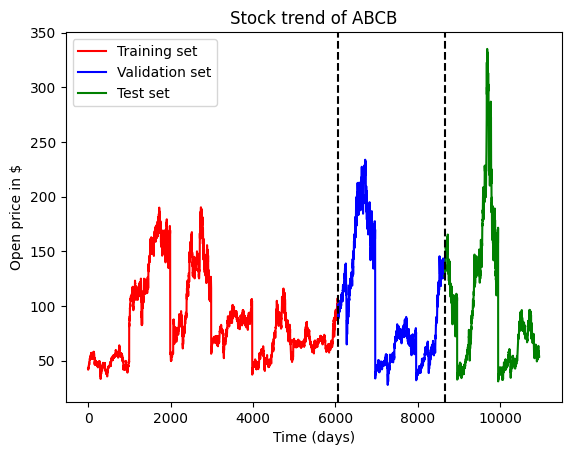

In [ ]:
import matplotlib.pyplot as plt
# Visualize the training, validation and test set
df_plot = df2['Open']
df_plot = df_plot.reset_index(drop=False)

# Get lengths of the three subsets
size_train = X_train.shape[0]
size_val = X_val.shape[0]
size_test = X_test.shape[0]

# Plot the subset splits
ax = df_plot.iloc[:size_train,1:2].plot(y=0, color='red', label='Training set')
df_plot.iloc[size_train:size_train+size_val,1:2].plot(y=0, color='blue', label='Validation set', ax=ax)
df_plot.iloc[size_train+size_val:df_plot.shape[0],1:2].plot(y=0, color='green', label='Test set', ax=ax)
ax.set_title("Stock trend of ABCB")
plt.xlabel('Time (days)')
plt.ylabel('Open price in $')
plt.axvline(x=size_train, color='black', linestyle='--')
plt.axvline(x=size_train+size_val, color='black', linestyle='--')
plt.show()

In [ ]:
# MinMax normalize the training data: x=(x-min(x)/(max(x)-min(x))
X_train_norm = X_train.copy()
y_train_norm = y_train.copy()
for i in range(0, len(X_train)):
    min_feature = np.min(X_train[i])
    max_feature = np.max(X_train[i])
    if min_feature == max_feature:
      continue
    else:
      X_train_norm[i] = (X_train[i] - min_feature) / (max_feature - min_feature)
      y_train_norm[i] = (y_train[i] - min_feature) / (max_feature - min_feature)

# MinMax normalize the validation data: x=(x-min(x)/(max(x)-min(x))
X_val_norm = X_val.copy()
y_val_norm = y_val.copy()
for i in range(0, len(X_val)):
    min_feature = np.min(X_val[i])
    max_feature = np.max(X_val[i])
    if min_feature == max_feature:
      continue
    else:
      X_val_norm[i] = (X_val[i] - min_feature) / (max_feature - min_feature)
      y_val_norm[i] = (y_val[i] - min_feature) / (max_feature - min_feature)

In [ ]:
### Create and train the model

# Import libraries
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import Dropout, LSTM
from tensorflow.keras import Sequential
### Create the model
model = Sequential()
model.add(LSTM(units=300, activation='tanh', return_sequences=True, input_shape=(window_size, 1)))
model.add(Dropout(0.3))
model.add(LSTM(units=200, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=200, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=150, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=7))
model.summary()
# Compiling the LSTM model
model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=0.0005), loss='mse', metrics=['mse'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 120, 300)          362400    
                                                                 
 dropout (Dropout)           (None, 120, 300)          0         
                                                                 
 lstm_1 (LSTM)               (None, 120, 200)          400800    
                                                                 
 dropout_1 (Dropout)         (None, 120, 200)          0         
                                                                 
 lstm_2 (LSTM)               (None, 120, 200)          320800    
                                                                 
 dropout_2 (Dropout)         (None, 120, 200)          0         
                                                                 
 lstm_3 (LSTM)               (None, 150)               2

In [ ]:
# ### Create and train the model

# # Import libraries
# import tensorflow as tf
# from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dense
# from tensorflow.keras.layers import Dropout, LSTM
# from tensorflow.keras import Sequential
# ### Create the model
# model = Sequential()
# model.add(LSTM(units=300, activation='tanh', return_sequences=True, input_shape=(120, 1)))
# model.add(Dropout(0.3))
# model.add(LSTM(units=200, return_sequences=True))
# model.add(Dropout(0.3))
# model.add(LSTM(units=200, return_sequences=True))
# model.add(Dropout(0.3))
# model.add(Dense(units=7))
# model.summary()
# # Compiling the LSTM model
# model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001), loss='mse', metrics=['mse'])


In [ ]:
# Create a callback ModelCheckpoint. This callback will save the model when finding one better than the current best.
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
mc = ModelCheckpoint(filepath="epoch-{epoch:02d}.hdf5", # Path to save the model
                                     monitor='val_mse', # Metric to evaluate the model performance when looking for a better model.
                                     mode='min', # mode='auto'/'max'/'min': the monitor should be max/min to be better.
                                                 # In auto mode, the mode is set to max if the quantities monitored are 'acc' or start with 'fmeasure' (f-score) and are set to min for the rest of the quantities.
                                     verbose=0, # Inform every time a better model is found and saved.
                                     save_best_only=True) # Only save the model if the current training epoch is the best. 'False' means save models of all training epochs
lr_reduced = ReduceLROnPlateau(monitor='val_mse', mode='min', verbose = 0,
                               factor = 0.2, patience = 3, min_lr = 0.000001)
es = EarlyStopping(monitor='val_mse', mode='min', verbose=1, patience=10)
history = model.fit(X_train_norm, y_train_norm, validation_data=(X_val_norm,y_val_norm), epochs=100, batch_size=1000, callbacks = [mc, lr_reduced, es])

In [ ]:
# MinMax normalize the test data: norm_x = (x-min(x) / (max(x) - min(x))
X_test_norm = X_test.copy()
y_test_norm = y_test.copy()
for i in range(0, len(X_test)):
    min_feature = np.min(X_test[i])
    max_feature = np.max(X_test[i])
    X_test_norm[i] = (X_test[i] - min_feature) / (max_feature - min_feature)
    y_test_norm[i] = (y_test[i] - min_feature) / (max_feature - min_feature)

In [ ]:
### Get prediction on the test data and convert the result back to stock price (i.e., de-normalization)
from sklearn.metrics import mean_squared_error

# Get prediction on the test data
y_pred_norm = model.predict(X_test_norm)
print("MSE on the test set: ", mean_squared_error(y_pred_norm, y_test_norm))

In [ ]:
# Y_test = y_test.reshape(y_test.shape[0], window_size, 1)
# Evaluate the model accuracy using the function model.evaluate()
model_eval = model.evaluate(X_test_norm, y_test_norm, batch_size=4096)
print("List of metrics" + str(model.metrics_names)) # List of possible metrics of the model evaluation, this is the metrics specified in the model.compile().

print("Test loss: " + str(model_eval[0])) # Test loss
print("Test accuracy: " + str(model_eval[1])) # Test accuracy

In [ ]:
X_test.shape
y_pred_norm.shape

In [ ]:
# Convert the result back to stock price (i.e., de-normalization) for visualization purpose
y_pred_denorm = []
for i in range(0, len(y_pred_norm)):
    min_feature = np.min(X_test[i])
    max_feature = np.max(X_test[i])
    y_pred_denorm.append(y_pred_norm[i] * (max_feature - min_feature) + min_feature)

# Select the last predicted value for each sequence
y_pred_last = [y[-1] for y in y_pred_denorm]

# Visualize predicted stock price versus real stock price
plt.figure(figsize=(16, 8), dpi=300)
plt.plot(y_pred_last, label='Predicted price')
plt.plot(y_test[:, -1], label='Real price')
plt.title('Stock trend prediction for the next 7 days', fontsize=16)
plt.xlabel('Time (days)', fontsize=14)
plt.ylabel('Open price in $', fontsize=14)
plt.grid()  # Add grid
plt.legend()  # Add legend
plt.show()


In [ ]:
testData = pd.read_csv("/content/gdrive/My Drive/nasdaq_csv/ABCB.csv")

In [ ]:
testData.head()

In [ ]:
import numpy as np

df = testData
X_example = []
y_example = []
window_size = 120  # Time window for data feature (size of 'number of days').
prediction_horizon = 7  # Number of days to predict.

# Only get the open price (index 2 in the data frame)
for i in range(1, len(df) - window_size - prediction_horizon + 1):
    data_feature = []
    data_label = []

    # Get a window_size time frame for data feature
    for j in range(window_size):
        data_feature.append(df.iloc[i + j, 2])

    # Next values are the labels (prices of the next prediction_horizon days) to be predicted
    for k in range(prediction_horizon):
        data_label.append(df.iloc[i + window_size + k, 2])

    # Append new data sample (feature and label) to X_data and y_data
    X_example.append(np.array(data_feature).reshape(window_size, 1))
    y_example.append(np.array(data_label))

In [ ]:
### Split the data into training, validation and test set

# Import the library
from sklearn.model_selection import train_test_split

# Split data into train, val and test. Note that 'shuffle=False' due to time-series data.
X_train_example, X_test_example, y_train_example, y_test_example = train_test_split(X_example, y_example, test_size=0.2, shuffle=False)
X_train_example, X_val_example, y_train_example, y_val_example = train_test_split(X_example, y_example, test_size=0.2, shuffle=False)

# Convert from lists to Numpy arrays for reshaping purpose
X_train_example = np.array(X_train_example)
X_val_example = np.array(X_val_example)
X_test_example = np.array(X_test_example)
y_train_example = np.array(y_train_example)
y_val_example = np.array(y_val_example)
y_test_example = np.array(y_test_example)

# Reshape the numpy array to fit the neural network input shape requirement
X_train_example = X_train_example.reshape(X_train_example.shape[0], window_size, 1)
X_val_example = X_val_example.reshape(X_val_example.shape[0], window_size, 1)
X_test_example = X_test_example.reshape(X_test_example.shape[0], window_size, 1)


# Print shape of the training, validation and test set
print("Shape of training set: ", X_train_example.shape)
print("Shape of validation set: ", X_val_example.shape)
print("Shape of test set: ", X_test_example.shape)

In [ ]:
# MinMax normalize the training data: x=(x-min(x)/(max(x)-min(x))
X_train_norm_example = X_train_example.copy()
y_train_norm_example = y_train_example.copy()
for i in range(0, len(X_train_example)):
    min_feature = np.min(X_train_example[i])
    max_feature = np.max(X_train_example[i])
    X_train_norm_example[i] = (X_train_example[i] - min_feature) / (max_feature - min_feature)
    y_train_norm_example[i] = (y_train_example[i] - min_feature) / (max_feature - min_feature)

# MinMax normalize the validation data: x=(x-min(x)/(max(x)-min(x))
X_val_norm_example = X_val_example.copy()
y_val_norm_example = y_val_example.copy()
for i in range(0, len(X_val_example)):
    min_feature = np.min(X_val_example[i])
    max_feature = np.max(X_val_example[i])
    X_val_norm_example[i] = (X_val_example[i] - min_feature) / (max_feature - min_feature)
    y_val_norm_example[i] = (y_val_example[i] - min_feature) / (max_feature - min_feature)

In [ ]:
# MinMax normalize the test data: norm_x = (x-min(x) / (max(x) - min(x))
X_test_norm_example = X_test_example.copy()
y_test_norm_example = y_test_example.copy()
for i in range(0, len(X_test_example)):
    min_feature = np.min(X_test_example[i])
    max_feature = np.max(X_test_example[i])
    X_test_norm_example[i] = (X_test_example[i] - min_feature) / (max_feature - min_feature)
    y_test_norm_example[i] = (y_test_example[i] - min_feature) / (max_feature - min_feature)

In [ ]:
### Get prediction on the test data and convert the result back to stock price (i.e., de-normalization)
from sklearn.metrics import mean_squared_error

# Get prediction on the test data
print(X_test_norm_example.shape)
y_pred_norm_example = model.predict(X_test_norm_example)
print("MSE on the test set: ", mean_squared_error(y_pred_norm_example, y_test_norm_example))

In [ ]:
# Y_test = y_test.reshape(y_test.shape[0], window_size, 1)
# Evaluate the model accuracy using the function model.evaluate()
model_eval = model.evaluate(X_test_norm_example, y_test_norm_example, batch_size=4096)
print("List of metrics" + str(model.metrics_names)) # List of possible metrics of the model evaluation, this is the metrics specified in the model.compile().

print("Test loss: " + str(model_eval[0])) # Test loss
print("Test accuracy: " + str(model_eval[1])) # Test accuracy

In [ ]:
# Convert the result back to stock price (i.e., de-normalization) for visualization purpose
y_pred_denorm_example = []
for i in range(0, len(y_pred_norm_example)):
    min_feature = np.min(X_test_example[i])
    max_feature = np.max(X_test_example[i])
    y_pred_denorm_example.append(y_pred_norm_example[i] * (max_feature - min_feature) + min_feature)





In [ ]:
# Select the last predicted value for each sequence
y_pred_last_example = [y[1] for y in y_pred_denorm_example]
# Visualize predicted stock price versus real stock price
plt.figure(figsize=(16, 8), dpi=300)
# plt.plot(y_pred_last_example, label='Predicted price')
plt.plot(y_pred_denorm_example, label = 'Predicted price')
plt.plot(y_test_example[:, -1], label='Real price')
plt.title('Stock trend prediction for the next 7 days', fontsize=16)
plt.xlabel('Time (days)', fontsize=14)
plt.ylabel('Open price in $', fontsize=14)
plt.grid()  # Add grid
plt.legend()  # Add legend
plt.show()

In [ ]:
print(y_pred_denorm_example)

In [ ]:
print(y_test_example)